In [1]:
import numpy as np 
from scipy.special import iv
import matplotlib.pyplot as plt 
import scipy.integrate as integrate
from tqdm import tqdm
from math import erf, erfc
from scipy.optimize import *
import os 


In [246]:
amps=np.linspace(0,3,100)
ind=len(amps)

channels = {}
channels[0] = [[.5,.5],[1,1]]
channels[1] = [[.5,.5],[.01,1]]
channels[11] = [[.5,.5],[.01,1]]
channels[2] = [[.5,.5],[.9, 1.]]
channels[3] = [[.5,.5],[.5, .55]]
channels[4] = [[.5,.5],[.001, 1.]]
channels[5] = [[.5,.5],[.00001, 1.]]
channels[6] = [[.5,.5],[.000001, 1.]]
channels[7] = [[.5,.5],[.5, .9]]
channels[8] = [[.5,.5],[.3, .4]]
channels[9] = [[.5,.5],[.3, .5]]


s2={}
fun2={}
s1={}
fun1={}
homodynes_values={}
helstroms_values={}
for caseid in [0,1,11]:
    print("\033[1m CASE{}:".format(caseid))
    print("attenuations: ",channels[caseid][1])
    

    s2[caseid]=np.load("data_cases/{}/ar_2L_s.npy".format(caseid))[1:]
    fun2[caseid]=np.load("data_cases/{}/ar_2L_betas.npy".format(caseid))#,fun2)
    s1[caseid]=np.load("data_cases/{}/ar_1L_s.npy".format(caseid))#,s1)[1:]
    fun1[caseid]=np.load("data_cases/{}/ar_1L_betas.npy".format(caseid))#,fun1)
    homodynes_values[caseid]=np.load("data_cases/{}/homodynes.npy".format(caseid))[1:]#,homodynes_values)
    helstroms_values[caseid]=np.load("data_cases/{}/helstroms.npy".format(caseid))[1:]#,helstroms_values)



 CASE0:
attenuations:  [1, 1]
 CASE1:
attenuations:  [0.01, 1]
 CASE11:
attenuations:  [0.01, 1]


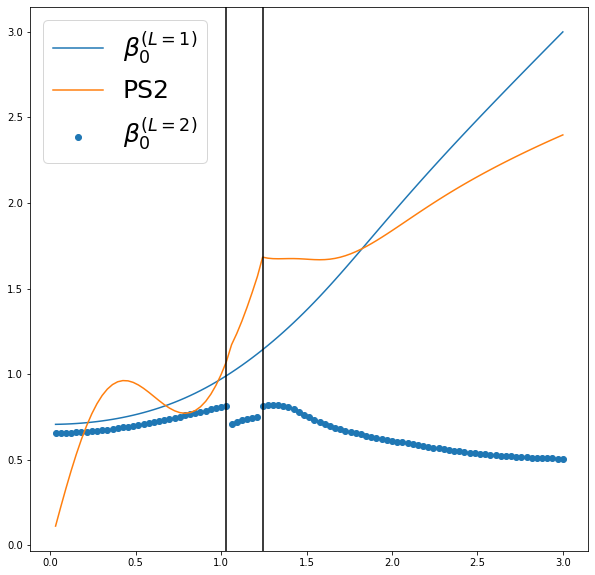

In [119]:
plt.figure(figsize=(10,10))
ax=plt.subplot(111)
ax.plot(amps[1:],np.abs(fun1[1][1:]), label=r'$\beta^{(L=1)}_0$')
ax.scatter(amps[1:],np.abs(fun2[1][1:][:,0]), label=r'$\beta^{(L=2)}_0$')
ax.plot(amps[1:], 80*(helstroms_values[1]-s2[1]), label="PS2")
ax.axvline(amps[34],color="black")
ax.axvline(amps[41],color="black")
ax.legend(prop={"size":25})

In [213]:
np.sign(fun2[0][:,0]) == np.sign(fun2[0][:,1])

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False])

In [212]:
np.sign(fun2[1][:,0]) == np.sign(fun2[1][:,1])

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [214]:
np.sign(fun2[1][:,1]) == np.sign(fun2[1][:,2])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [215]:
np.sign(fun2[0][:,1]) == np.sign(fun2[0][:,2])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
       False])

In [210]:
np.sign(fun2[1][:,0]) - np.sign(fun2[0][:,0])

array([ 0.,  0.,  2.,  0., -2.,  0., -2.,  0.,  0., -2.,  0.,  0., -2.,
       -2., -2., -2.,  0.,  2., -2.,  0., -2.,  0.,  0., -2.,  0., -2.,
       -2.,  2.,  2., -2., -2.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  2.,
       -2.,  2.,  0.,  0.,  0.,  2., -2.,  2., -2.,  0.,  0.,  0., -2.,
        0.,  2.,  0.,  0.,  0., -2.,  0.,  2.,  0.,  0.,  0.,  2.,  0.,
        0.,  2., -2.,  2.,  2.,  2.,  2.,  2., -2.,  0.,  0.,  2.,  2.,
        0., -2., -2.,  0., -2.,  0., -2., -2., -2., -2.,  0.,  2., -2.,
        0., -2.,  2.,  0.,  0., -2.,  0.,  0.,  2.])

In [228]:
from math import sin
from random import random

from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, LogColorMapper
from bokeh.palettes import *
from bokeh.plotting import figure
from bokeh.transform import transform

output_notebook()

source = ColumnDataSource(data=dict(x=fun2[caseid][:,1][1:], y=fun2[caseid][:,2][1:],
                                    alphas=amps[1:], pro=helstroms_values[caseid]-s2[caseid],
                                    b0=np.abs(fun2[caseid][:,0][1:]), b0noiseless=np.abs(fun2[0][:,0])[1:]))
hover = HoverTool(tooltips=[
    ('amplitude', '@alphas'),
])
mapper = LogColorMapper(palette=grey(256))#, low=min(amps), high=max(amps))

wi, he = 800,300
threb0=30
aci=.1
p1 = figure(plot_width=wi, plot_height=he, tools=[hover], title="AR, success probability (L=2)")
p1.circle('alphas', 'pro', size=10, source=source,
         fill_color=transform('alphas', mapper))
p1.xaxis.axis_label = "α"

p = figure(plot_width=wi, plot_height=he, tools=[hover], title="Action space (second layer)")
p.circle('x', 'y', size=10, source=source,
         fill_color=transform('alphas', mapper))
l1=np.max(np.abs(fun2[caseid][:,1]))
l2=np.max(np.abs(fun2[caseid][:,2]))
p.line(np.linspace(-l1,l1,100),np.linspace(-l2,l2,100),line_color="blue",alpha=.5, line_width=1, legend_label='y=x')
p.line(np.linspace(-l1,l1,100),-np.linspace(-l2,l2,100),line_color="blue",alpha=.5, line_width=1, legend_label='y=-x')
p.circle(fun2[0][:,2][1:][:threb0],-fun2[0][:,2][1:][:threb0], color="red",size=10,fill_alpha=aci, line_alpha=aci, fill_color="red")#,fill_color=transform("alphas",mapper))

p.xaxis.axis_label = "β10"
p.yaxis.axis_label = "β11"

p2 = figure(plot_width=wi, plot_height=he, tools=[hover], title="Action space (first layer)")
p2.circle("alphas","b0", size=10, source=source,
         fill_color=transform("alphas", mapper))
p2.line(amps[1:][:threb0],np.abs(fun2[0][:,0])[1:][:threb0], line_alpha=1,line_dash=[10], line_width=3, color="red")#,fill_color=transform("alphas",mapper))
p2.line(amps[1:],-fun1[0][1:], line_width=1)

l1=np.max(np.abs(fun2[caseid][:,0]))

#p2.line(ampis[1:],ampis[1:],line_color="blue",alpha=.5, line_width=1, legend='y=x')
p2.xaxis.axis_label = "α"
p2.yaxis.axis_label = "β0"


show(column(p1,p2,p))

Loading BokehJS ...

(array([14.,  6.,  4.,  4.,  2.,  3.,  2.,  3.,  2.,  1.,  2.,  2.,  2.,
         1.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  1.,
         2.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,
         2.,  1.,  2.,  1.,  2.,  1.,  2.,  1.,  2.,  1.,  2.]),
 array([0.70722023, 0.75303989, 0.79885955, 0.84467921, 0.89049887,
        0.93631853, 0.98213819, 1.02795785, 1.07377751, 1.11959717,
        1.16541683, 1.21123649, 1.25705615, 1.30287581, 1.34869547,
        1.39451513, 1.44033479, 1.48615446, 1.53197412, 1.57779378,
        1.62361344, 1.6694331 , 1.71525276, 1.76107242, 1.80689208,
        1.85271174, 1.8985314 , 1.94435106, 1.99017072, 2.03599038,
        2.08181004, 2.1276297 , 2.17344936, 2.21926902, 2.26508869,
        2.31090835, 2.35672801, 2.40254767, 2.44836733, 2.49418699,
        2.54000665, 2.58582631, 2.63164597, 2.67746563, 2.72328529,
        2.76910495, 2.81492461, 2.86074427, 2.90656393, 2.95238359,
        2.99820325]),
 <BarContainer

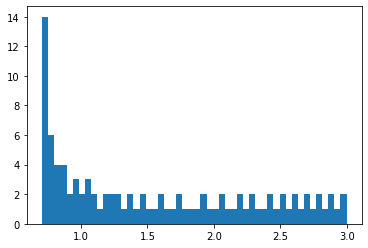

In [248]:
plt.hist(np.abs(fun1[1][1:]), bins=int(len(fun1[1])/2))

In [241]:
print("transition happens between amplitudes ({}, {} )\n which are indices ({}, {})".format(round(amps[ind1],2), round(amps[ind2],2),ind1,ind2))

transition happens between amplitudes (1.03, 1.24 )
 which are indices (34, 41)


In [251]:
np.abs(fun2[0][:,0])[1:10]

array([0.65567402, 0.65623459, 0.65727125, 0.65863214, 0.66039237,
       0.66249169, 0.6649905 , 0.66789511, 0.67118772])

In [256]:
np.abs(fun1[0])[1:10]

array([0.70732183, 0.70796879, 0.7090447 , 0.7105813 , 0.71256189,
       0.7149937 , 0.71788683, 0.72125629, 0.72512389])

In [279]:
amps11=np.linspace(1,2,100)

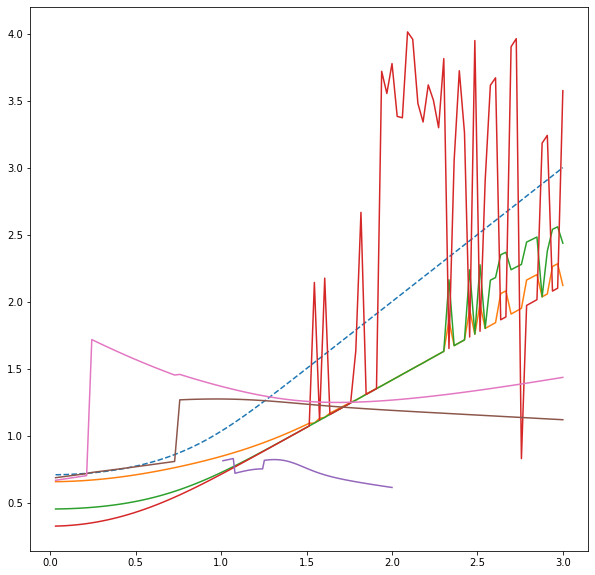

In [283]:
plt.figure(figsize=(10,10))
plt.plot(amps[1:],np.abs(fun1[0][1:]),'--')
plt.plot(amps[1:],np.abs(fun2[0][1:]))
plt.plot(amps11[1:],np.abs(fun2[11][:,0][1:]))
plt.plot(amps[1:],np.abs(fun2[11][:,1][1:]))
plt.plot(amps[1:],np.abs(fun2[11][:,2][1:]))


In [ ]:
from math import sin
from random import random

from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, LogColorMapper
from bokeh.palettes import *
from bokeh.plotting import figure
from bokeh.transform import transform

output_notebook()

source = ColumnDataSource(data=dict(x=fun2[caseid][:,1][1:], y=fun2[caseid][:,2][1:],
                                    alphas=amps[1:], pro=helstroms_values[caseid]-s2[caseid],
                                    b0=np.abs(fun2[caseid][:,0][1:]), b0noiseless=np.abs(fun2[0][:,0])[1:]))
hover = HoverTool(tooltips=[
    ('amplitude', '@alphas'),
])
mapper = LogColorMapper(palette=grey(256))#, low=min(amps), high=max(amps))

wi, he = 800,300
threb0=30
aci=.1
p1 = figure(plot_width=wi, plot_height=he, tools=[hover], title="AR, success probability (L=2)")
p1.circle('alphas', 'pro', size=10, source=source,
         fill_color=transform('alphas', mapper))
p1.xaxis.axis_label = "α"

p = figure(plot_width=wi, plot_height=he, tools=[hover], title="Action space (second layer)")
p.circle('x', 'y', size=10, source=source,
         fill_color=transform('alphas', mapper))
#l1=np.max(np.abs(fun2[caseid][:,1]))
#l2=np.max(np.abs(fun2[caseid][:,2]))
#p.line(np.linspace(-l1,l1,100),np.linspace(-l2,l2,100),line_color="blue",alpha=.5, line_width=1, legend_label='y=x')
#p.line(np.linspace(-l1,l1,100),-np.linspace(-l2,l2,100),line_color="blue",alpha=.5, line_width=1, legend_label='y=-x')
#p.circle(fun2[0][:,2][1:][:threb0],-fun2[0][:,2][1:][:threb0], color="red",size=10,fill_alpha=aci, line_alpha=aci, fill_color="red")#,fill_color=transform("alphas",mapper))

p.xaxis.axis_label = "β10"
p.yaxis.axis_label = "β11"

p2 = figure(plot_width=wi, plot_height=he, tools=[hover], title="Action space (first layer)")
p2.circle("alphas","b0", size=10, source=source,
         fill_color=transform("alphas", mapper))
p2.line(amps[1:][:threb0],np.abs(fun2[0][:,0])[1:][:threb0], line_alpha=1,line_dash=[10], line_width=3, color="red")#,fill_color=transform("alphas",mapper))
p2.line(amps[1:],-fun1[0][1:], line_width=1)

l1=np.max(np.abs(fun2[caseid][:,0]))

#p2.line(ampis[1:],ampis[1:],line_color="blue",alpha=.5, line_width=1, legend='y=x')
p2.xaxis.axis_label = "α"
p2.yaxis.axis_label = "β0"


show(column(p1,p2,p))

In [13]:
ss2 = np.load("datos/1/ar_2L_s.npy")
fun22 = np.load("datos/1/ar_2L_betas.npy")

In [247]:
caseid=11

source = ColumnDataSource(data=dict(x=fun2[caseid][:,1][1:], y=fun2[caseid][:,2][1:],
                                    alphas=amps[1:], pro=helstroms_values[caseid]-s2[caseid],
                                    b0=np.abs(fun2[caseid][:,0][1:]), b0noiseless=np.abs(fun2[0][:,0])[1:]))
hover = HoverTool(tooltips=[
    ('amplitude', '@alphas'),
])
mapper = LogColorMapper(palette=grey(256))#, low=min(amps), high=max(amps))

wi, he = 800,300
threb0=30
aci=.1
p1 = figure(plot_width=wi, plot_height=he, tools=[hover], title="AR, success probability (L=2)")
p1.circle('alphas', 'pro', size=10, source=source,
         fill_color=transform('alphas', mapper))
p1.xaxis.axis_label = "α"

p = figure(plot_width=wi, plot_height=he, tools=[hover], title="Action space (second layer)")
p.circle('x', 'y', size=10, source=source,
         fill_color=transform('alphas', mapper))
l1=np.max(np.abs(fun2[caseid][:,1]))
l2=np.max(np.abs(fun2[caseid][:,2]))
p.line(np.linspace(-l1,l1,100),np.linspace(-l2,l2,100),line_color="blue",alpha=.5, line_width=1, legend_label='y=x')
p.line(np.linspace(-l1,l1,100),-np.linspace(-l2,l2,100),line_color="blue",alpha=.5, line_width=1, legend_label='y=-x')
p.circle(fun2[0][:,2][1:][:threb0],-fun2[0][:,2][1:][:threb0], color="red",size=10,fill_alpha=aci, line_alpha=aci, fill_color="red")#,fill_color=transform("alphas",mapper))

p.xaxis.axis_label = "β10"
p.yaxis.axis_label = "β11"

p2 = figure(plot_width=wi, plot_height=he, tools=[hover], title="Action space (first layer)")
p2.circle("alphas","b0", size=10, source=source,
         fill_color=transform("alphas", mapper))
p2.line(amps[1:][:threb0],np.abs(fun2[0][:,0])[1:][:threb0], line_alpha=1,line_dash=[10], line_width=3, color="red")#,fill_color=transform("alphas",mapper))
p2.line(amps[1:],-fun1[0][1:], line_width=1)

l1=np.max(np.abs(fun2[caseid][:,0]))

#p2.line(ampis[1:],ampis[1:],line_color="blue",alpha=.5, line_width=1, legend='y=x')
p2.xaxis.axis_label = "α"
p2.yaxis.axis_label = "β0"


show(column(p1,p2,p))

In [56]:
from bokeh.models import HoverTool
from bokeh.plotting import figure
from bokeh.layouts import row, column


source = ColumnDataSource(data={"x":range(100),"wind":np.random.randn(100), "coal":np.random.randn(100)})

fig1 = figure(plot_width=800, plot_height=300)
fig2 = figure(plot_width=800, plot_height=300)

plot1 =fig1.line(x='x',y= 'wind',source=source,color='blue')
fig1.add_tools(HoverTool(renderers=[plot1,plot2], tooltips=[('wind',"@wind")],mode='vline'))

plot2 = fig2.line(x='x',y= 'coal',source=source,color='red')
fig2.add_tools(HoverTool(renderers=[plot2], tooltips=[("coal","@coal"),('wind',"@wind")],mode='vline'))

column(fig1,fig2)

Column(id='8215', ...)